<div width=50% style="display: block; margin: auto">
    <img src="figures/ucl-logo.svg" width=100%>
</div>

### [UCL-ELEC0136 Data Acquisition and Processing Systems 2024]()
University College London
# Lab 3: Data Processing #1


In this lab, we will use the _open-meteo_ API (https://open-meteo.com/), to acquire historical weather data for London from the past 2 years, inspect it, and prepare it for modelling.

### Objectives
* Learn to deal with **time series**
* Learn to **plot** and represent data
* **Normalise** your data
* Detect and handle **outliers** in time series

### Constraints
* You cannot use pre-existing functions to normalise your data or calculate statistics about it.
* This includes functions from `scipy`, `pandas` and other statistics library.
* This doesn't mean you cannot use `pandas`, but that you cannot use its stats functions (e.g., functions to calculate percentile)
* You must you `numpy` only to manipulate your data
* All data must be acquired through Python: you cannot download the data by browsing to the website and using the mouse 

<hr width=70% style="float: left">

### TASKS

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 1: Acquiring data</h4>

* Create a function `acquire_data(latitude, longitude, start_date, end_date, features)` that acquires **daily** data for **London** between the **1st January 1950** and the **31st December 1954** (included)
* We are interested in the following **features**:
  * Mean Temperature (2 m)
  * Minimum Temperature (2 m)
  * Maximum Temperature (2 m)
  * Precipitation Sum
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* Use a WEB request to acquire the data (like for lab 1), the API endpoint is https://archive-api.open-meteo.com/v1/archive
* Take a look at the open-meteo docs https://open-meteo.com/en/docs/historical-weather-api to see which parameters to use
* Always specify a timezone (you can use `timezone=GMT`)

</div>


In [38]:
from typing import List
import requests
import json
import matplotlib.pyplot as plt

# create a function
def acquire_data(latitude: float, longitude: float, start_date: str, end_date: str, features: List[str]) -> dict:
    """
    Acquires data from the Open-meteo API for a given location and time period.
    The API endpoint is https://archive-api.open-meteo.com/v1/archive.

    Args:
        latitude (float): latitude of the location
        longitude (float): longitude of the location
        start_date (str): start date of the data in the format YYYY-MM-DD
        end_date (str): end date of the data in the format YYYY-MM-DD
        features (List[str]): list of features to be extracted from the API
    Returns:
        (dict): dictionary of data
    """
    # add your code here

    url = "https://archive-api.open-meteo.com/v1/archive"

    features = ','.join(features)

    parameters = {
        "latitude": latitude,
        "longitude": longitude,
        "start_date": start_date,
        "end_date": end_date,
        "daily": features,
        "timezone": "GMT",
    }
    
    response = requests.get(url, params = parameters)

    response.raise_for_status()

    weather = response.json()

    return weather


<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 2: Handling data</h4>

* Run the function above to acquire the data
* Create a pandas dataframe from the acquired data
</div>

In [39]:
# add your code here

import pandas as pd

london_latitude = 51.5072
london_longitude = 0.1276
start_date = "1950-01-01"
end_date = "1954-12-31"
features = ["temperature_2m_mean","temperature_2m_min","temperature_2m_max","precipitation_sum"]

data = acquire_data(london_latitude, london_longitude, start_date, end_date, features)

time_series = data["daily"]

time_series = pd.DataFrame(time_series)
meta_data = pd.DataFrame(data)

# let's have a look at it
meta_data.head()

,latitude,longitude,generationtime_ms,utc_offset_seconds,timezone,timezone_abbreviation,elevation,daily_units,daily
time,51.493847,0.163043,1.402974,0,GMT,GMT,3.0,iso8601,"[1950-01-01, 1950-01-02, 1950-01-03, 1950-01-0..."
temperature_2m_mean,51.493847,0.163043,1.402974,0,GMT,GMT,3.0,°C,"[1.5, 6.8, 10.5, 9.4, 8.2, 6.5, 9.3, 7.1, 5.8,..."
temperature_2m_min,51.493847,0.163043,1.402974,0,GMT,GMT,3.0,°C,"[-1.6, 0.1, 10.1, 8.1, 6.0, 3.9, 7.5, 4.9, 4.1..."
temperature_2m_max,51.493847,0.163043,1.402974,0,GMT,GMT,3.0,°C,"[4.2, 10.5, 11.2, 10.6, 9.5, 9.1, 12.4, 9.6, 8..."
precipitation_sum,51.493847,0.163043,1.402974,0,GMT,GMT,3.0,mm,"[0.0, 0.0, 1.7, 0.0, 2.7, 0.8, 0.1, 0.0, 0.0, ..."


In [40]:
dt = pd.DataFrame(data['daily'])
dt

,time,temperature_2m_mean,temperature_2m_min,temperature_2m_max,precipitation_sum
0,1950-01-01,1.5,-1.6,4.2,0.0
1,1950-01-02,6.8,0.1,10.5,0.0
2,1950-01-03,10.5,10.1,11.2,1.7
3,1950-01-04,9.4,8.1,10.6,0.0
4,1950-01-05,8.2,6.0,9.5,2.7
...,...,...,...,...,...
1821,1954-12-27,7.2,5.7,9.3,0.0
1822,1954-12-28,7.0,5.0,9.0,0.0
1823,1954-12-29,7.5,6.5,8.8,0.1
1824,1954-12-30,6.5,5.4,7.7,0.0


<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 3: Plot your data</h4>

* Create a function `lineplot(x, y, title, x_label, y_label)` that creates a lineplot for the feature named `feature_name` and returns both the `Figure` and the `Axis` objects
* The function must return both the matplotlib `figure` object and the `axis` object
* Use the function to create two images containing plots of both the temperature and precipitations and save them to disk
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* Use `matplotlib` to create the plots
* Use the appropriate type of plot for the data that you want to visualise
* For example, you can use a lineplot to plot the average temperature
* Or, you can use a candlestick plot a shaded areaplot to plot min, max, and average temperature in the same figure

</div>


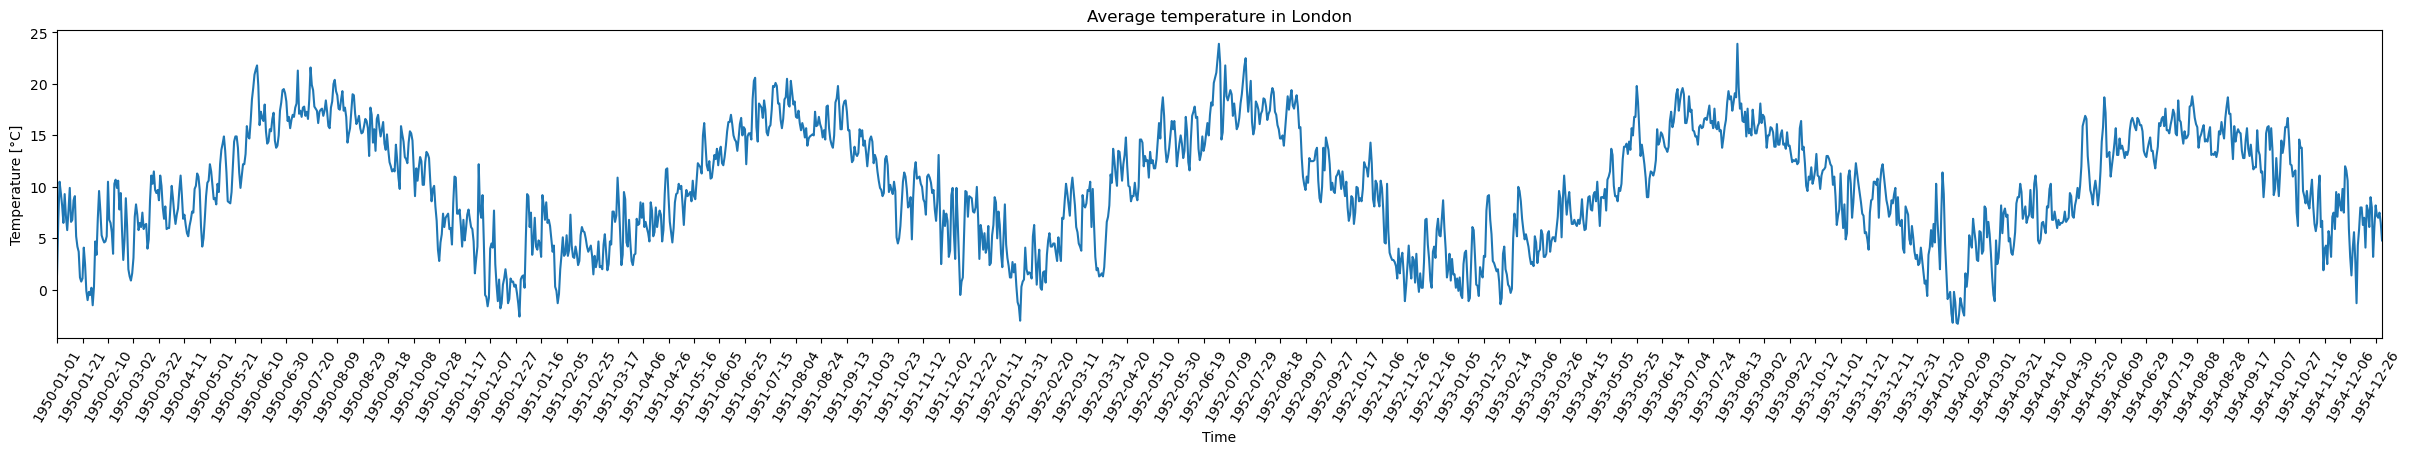

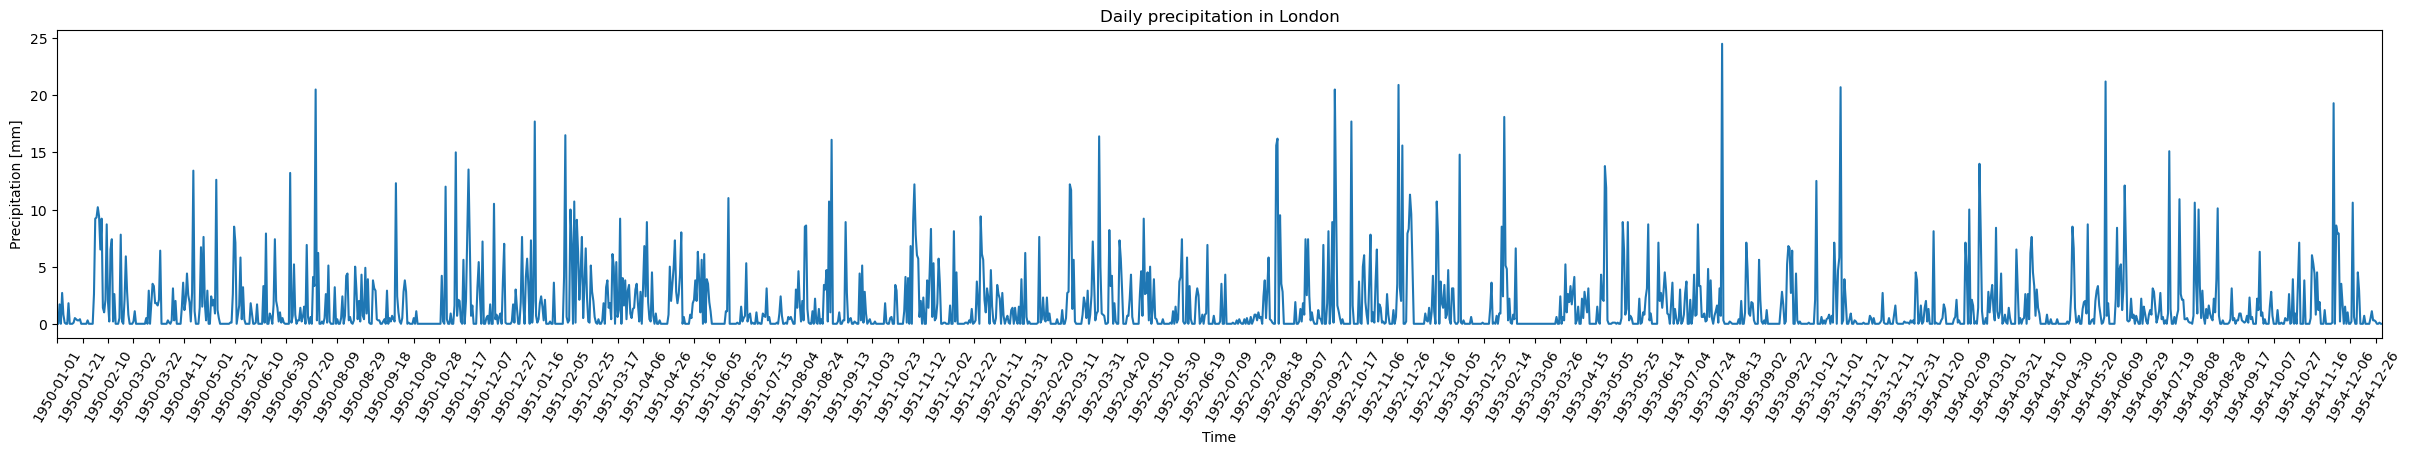

In [41]:
from numpy.typing import ArrayLike
import matplotlib.pyplot as plt


def lineplot(x: ArrayLike, y: ArrayLike, title: str, x_label: str, y_label: str) -> (plt.Figure, plt.Axes):
    """
    Creates a line plot for the given data, title and labels.

    Args:
        x (ArrayLike): value of the data on the x-axis
        y (ArrayLike): value of the data on the y-axis
        title (str): title of the plot
        x_label (str): x-axis label
        y_label (str): y-axis label
    Returns:
        (plt.Figure, plt.Axes): matplotlib figure and axes objects
    """
    # add your code here
    # Create the figure
    fig, ax = plt.subplots(1, figsize=(30, 4))
    
    # add the data to the plot
    ax.plot(x, y)

    # remove whitespace before and after
    ax.margins(x=0)

    ax.set_title(title)
    ax.set_xlabel(x_label) 
    ax.set_ylabel(y_label)
    
    #(position,label, rotation=60) The second x[::20] will set which labels to rotate 60 degree
    ax.set_xticks(x[::20],x[::20], rotation=60) #x[::20] = Take every 20th element of the array
    return fig, ax 

x = time_series['time']
y = time_series['temperature_2m_mean']

lineplot(x, y, "Average temperature in London", "Time", "Temperature [°C]")
plt.show()

x = time_series['time']
y = time_series['precipitation_sum']

lineplot(x, y, "Daily precipitation in London", "Time", "Precipitation [mm]")
plt.show()

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 3.1: multivariate plots</h4>

* Create a function `lineplots(x, ys, title, x_label, y_label, legend)` that plot the two variables on the same graph and returns both the `Figure` and the `Axis` objects
* Add a legend
</div>

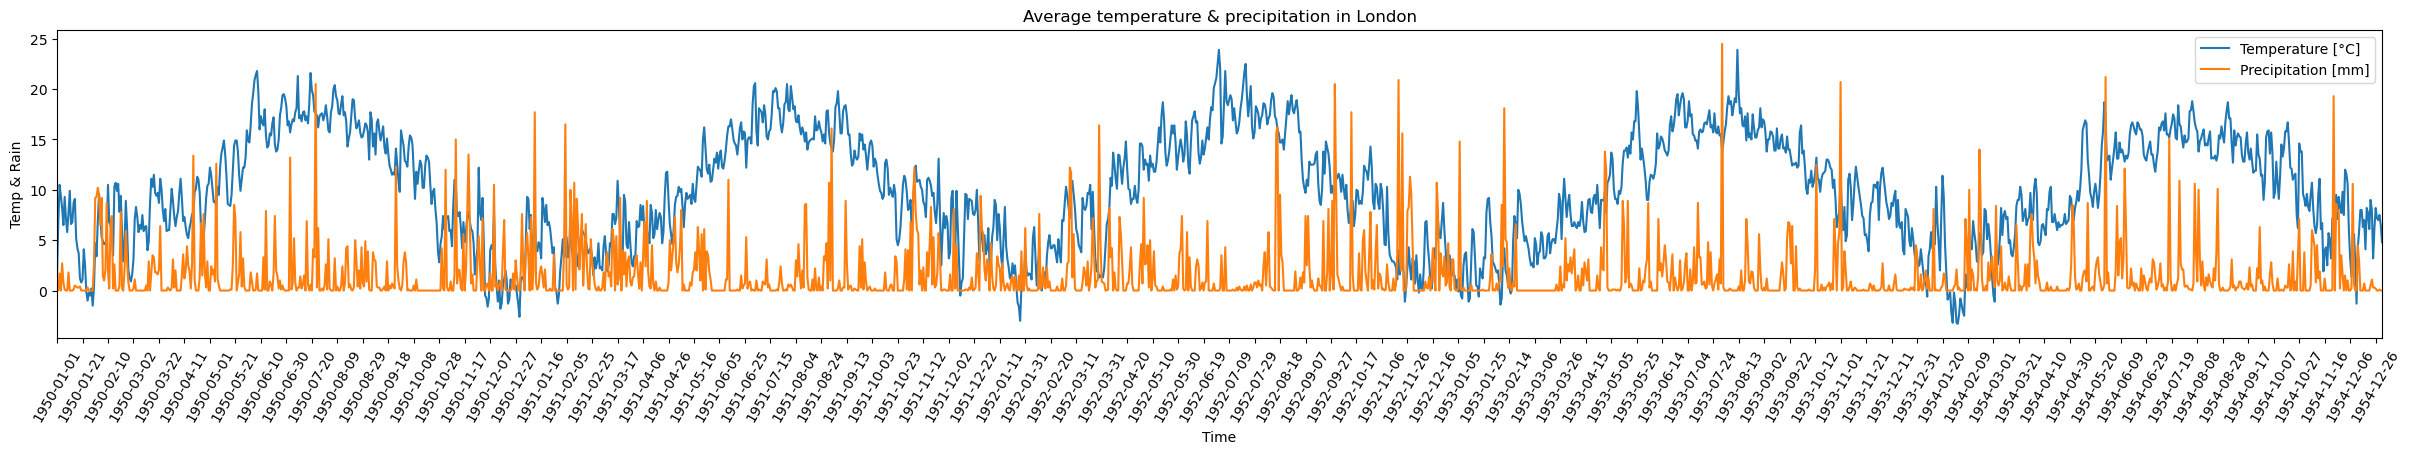

In [42]:
def lineplots(x: ArrayLike, ys: List[ArrayLike], title: str, x_label: str, y_label: str, legend: List[str]) -> (plt.Figure, plt.Axes):
    """
    Creates a line plot for each list of data in the given list of data, title and labels.

    Args:
        x (ArrayLike): value of the data on the x-axis
        ys (List[ArrayLike]): list of values of the data on the y-axis
        title (str): title of the plot
        x_label (str): x-axis label
        y_label (str): y-axis label
        legend (List[str]): list of legend labels
    Returns:
        (plt.Figure, plt.Axes): matplotlib figure and axes objects
    """
    # add your code here
    fig, ax = plt.subplots(1, figsize=(30, 4))
    
    # add the data to the plot
    for y in ys: #Multiple y output in ys
        ax.plot(x, y)

    # remove whitespace before and after
    ax.margins(x=0)

    ax.set_title(title)
    ax.set_xlabel(x_label) 
    ax.set_ylabel(y_label)
    
    #(position,label, rotation=60) The second x[::20] will set which labels to rotate 60 degree
    ax.set_xticks(x[::20],x[::20], rotation=60) #x[::20] = Take every 20th element of the array

    ax.legend(legend)
    
    return fig, ax 

x = time_series['time']
y1 = time_series['temperature_2m_mean']
y2 = time_series['precipitation_sum']

ys = [y1,y2]

lineplots(x, ys, "Average temperature & precipitation in London", "Time", "Temp & Rain", legend=["Temperature [°C]", "Precipitation [mm]"])
plt.show()

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 3.2: Plot with additional statistics</h4>

* Create a shaded area plot, where the mean temperature is the central line, and the minimum, and the maximum are the lower and upper bounds of the shaded area.
* The function should return both the `Figure` and the `Axis` objects
* The shaded area must be 0.3 opacity
* See https://swdevnotes.com/python/2020/display-line-chart-range/ for an example output
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* You can modify existing plots by reusing the `axis`
* For example, running `ax.plot` on an axis that already contains another plot, adds a plot on top of it

</div>


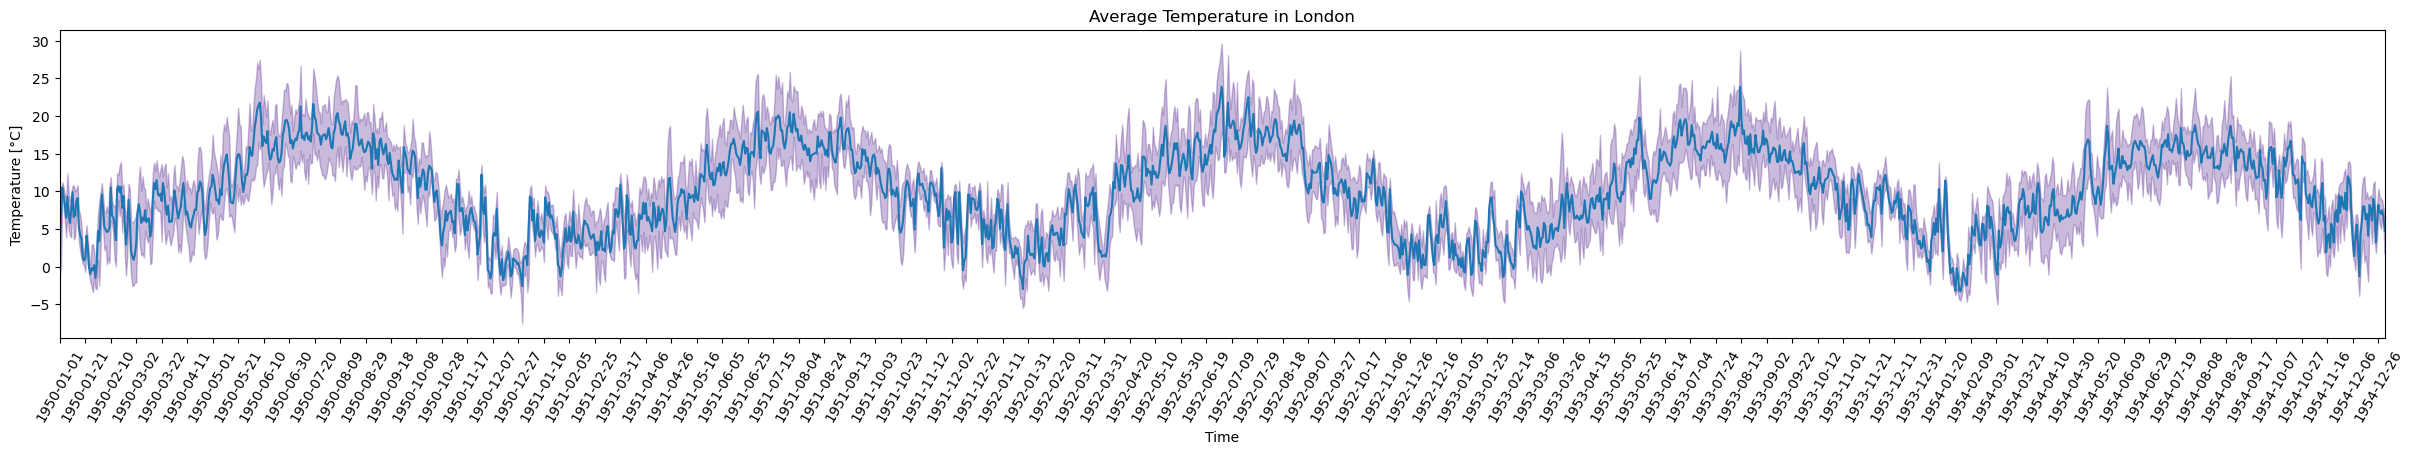

In [43]:
clr = plt.cm.Purples(0.9)

# add your code here
x = time_series['time']
y = time_series['temperature_2m_mean']
y_min = time_series['temperature_2m_min']
y_max = time_series['temperature_2m_max']

fig, ax = lineplot(x, y, "Average Temperature in London", "Time", "Temperature [°C]")
ax.fill_between(x, y_min, y_max, alpha=0.3, edgecolor=clr, facecolor=clr)
plt.show()

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 4: Normalising your data</h4>

* Create a function `minmax_norm(x)` that takes the acquired data, normalises the data using Min-Max normalisation only using `numpy`
* The function should returns an array containing the normalised data
* Normalise the `temperature_2m_mean` feature
* Plot the normalised data over the non-normalised one in the same plot
</div>

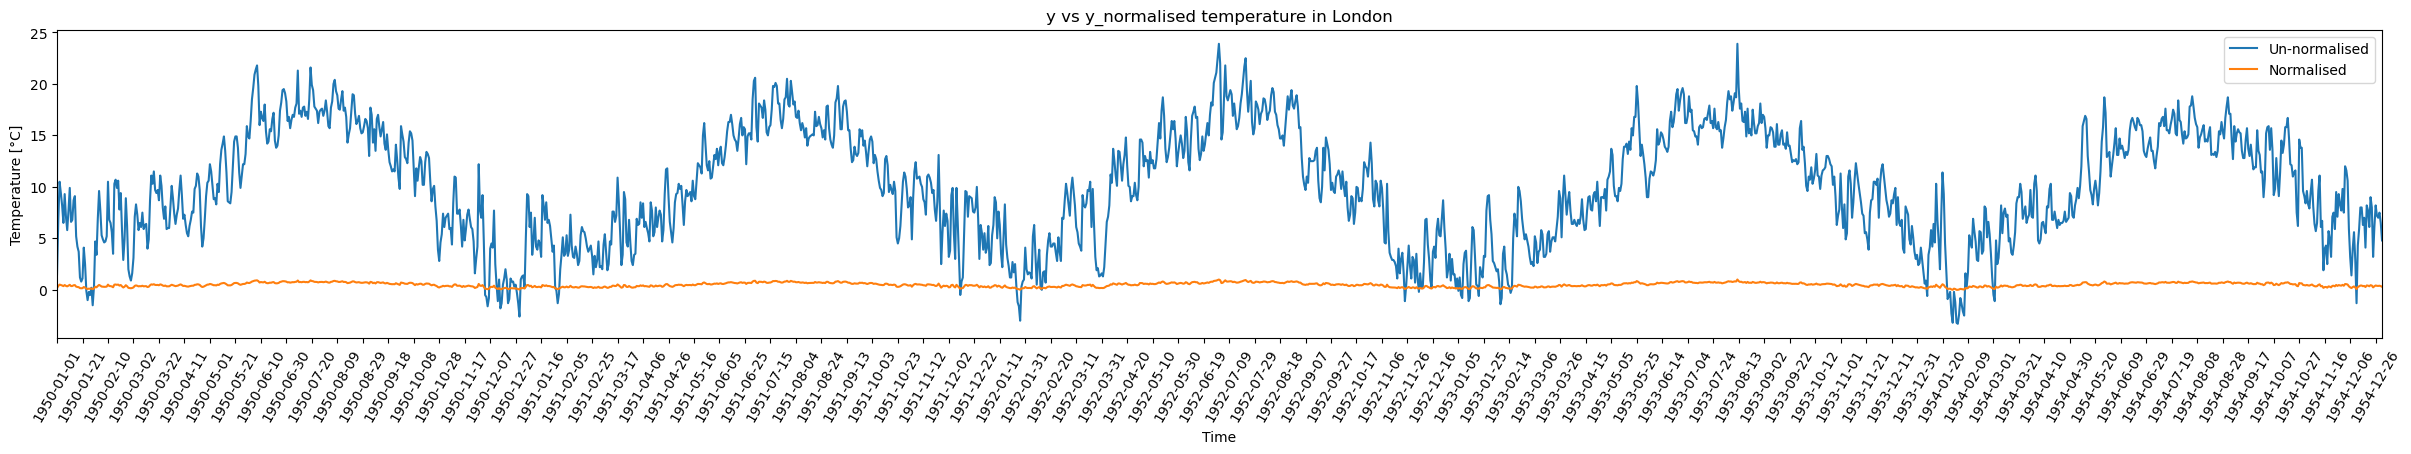

In [44]:
import numpy as np


def minmax_norm(x: ArrayLike) -> ArrayLike:
    """
    Normalises the data between 0 and 1 using the min-max normalization.

    Args:
        x (ArrayLike): data to be normalized
    Returns:
        (ArrayLike): normalized data
    """
    # add your code here
    # make sure the input data is a numpy array
    x = np.array(x)

    # get the extremes
    x_min = x.min()
    x_max = x.max()
    
    normalised = (x - x_min) / (x_max - x_min)

    return normalised

#Get data
x = time_series['time']
y = time_series['temperature_2m_mean']

y_normalised = minmax_norm(y)

fig, ax = lineplot(x, y, "y vs y_normalised temperature in London", "Time", "Temperature [°C]")
ax.plot(x, y_normalised)
ax.legend(["Un-normalised", "Normalised"])

plt.show()

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 4.1: Z-score normalisation</h4>

* Create a function `zscore_norm(x)` that takes a pandas series and normalises it using the z-score.
* The function should returns an array containing the normalised data
* Normalise the `temperature_2m_mean` feature
* Plot the normalised data over the non-normalised one in the same plot
</div>

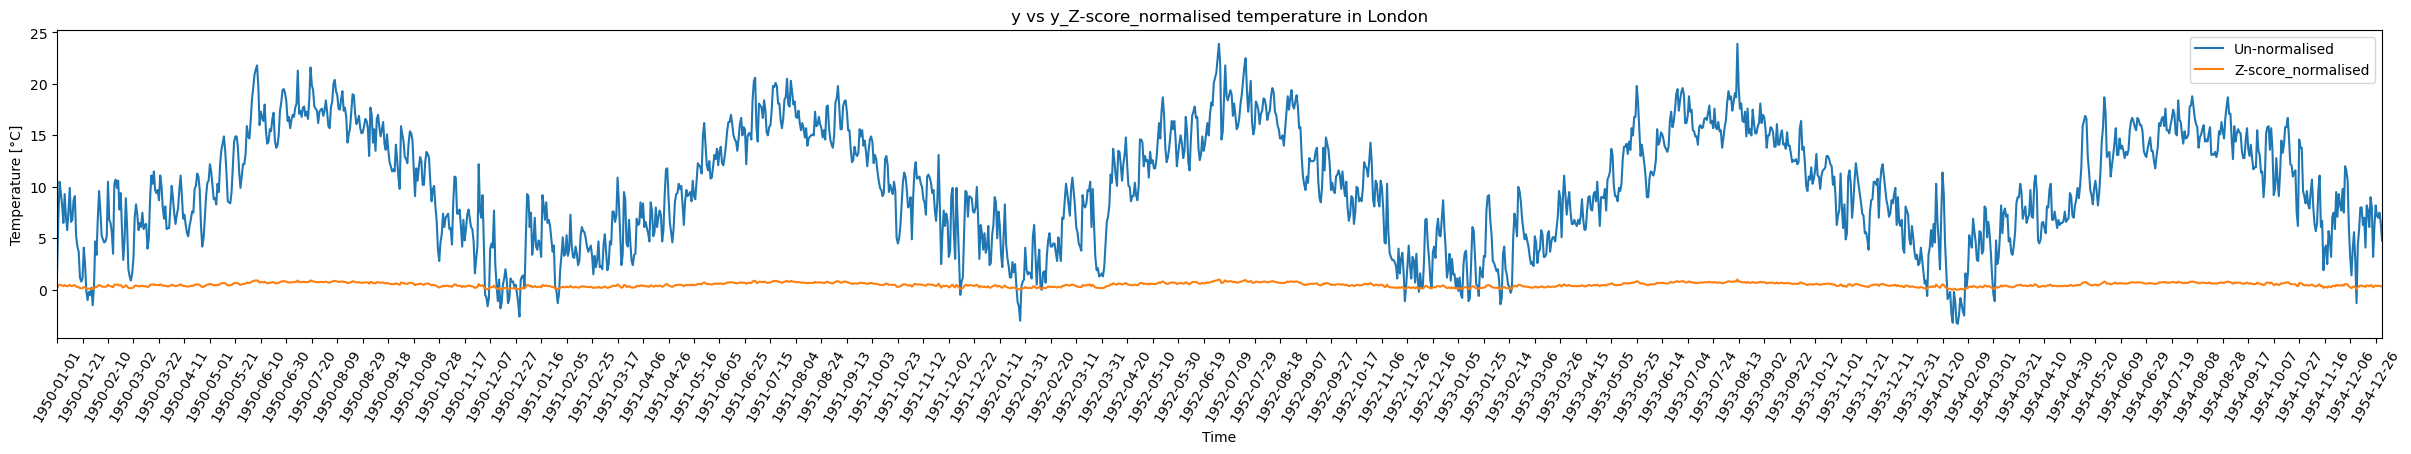

In [45]:
def zscore_norm(x: ArrayLike) -> ArrayLike:
    """
    Normalises the data using the z-score normalization.

    Args:
        x (ArrayLike): data to be normalized
    Returns:
        (ArrayLike): normalized data
    """
    # add your code here
    x = np.array(x)

    # get the extremes
    x_mean = x.mean()
    x_std = x.std()
    
    z_normalised = (x - x_mean) / x_std

    return z_normalised

#Get data
x = time_series['time']
y = time_series['temperature_2m_mean']

z_score_normalised = minmax_norm(y)

fig, ax = lineplot(x, y, "y vs y_Z-score_normalised temperature in London", "Time", "Temperature [°C]")
ax.plot(x, z_score_normalised)
ax.legend(["Un-normalised", "Z-score_normalised"])

plt.show()

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 5: Outliers detection</h4>

* Create a function `zscore_outliers(x, threshold=3)` that takes the acquired data, checks if each data point is an outliers by verifying that its z-score is greater than `threshold`
* The function must return the index of the outliers
* Check for outliers in `temperature_2m_mean`
</div>

In [46]:
def zscore_outliers(x: ArrayLike, threshold: int=3) -> ArrayLike:
    """
    Detects outliers using the z-score method and returns the indices of the outliers.

    Args:
        x (ArrayLike): data to be checked for outliers
        threshold (int): threshold for the z-score method
    
    Returns:
        (ArrayLike): indices of the outliers
    """
    # add your code here
    x = np.array(x)

    # get the extremes
    x_mean = x.min() #CHANGE THIS BACK to mean
    x_std = x.std()
    
    z_score = (x - x_mean) / x_std

    outlier = abs(z_score) > threshold

    return np.nonzero(outlier)

# get the data
y = time_series['temperature_2m_mean']

# analyse it
outliers_idx = zscore_outliers(y)
print(outliers_idx)

(array([ 129,  130,  131,  132,  139,  140,  141,  142,  148,  149,  150,
        151,  152,  153,  154,  155,  156,  157,  158,  159,  160,  161,
        162,  163,  164,  165,  166,  167,  168,  169,  170,  171,  172,
        173,  174,  175,  176,  177,  178,  179,  180,  181,  182,  183,
        184,  185,  186,  187,  188,  189,  190,  191,  192,  193,  194,
        195,  196,  197,  198,  199,  200,  201,  202,  203,  204,  205,
        206,  207,  208,  209,  210,  211,  212,  213,  214,  215,  216,
        217,  218,  219,  220,  221,  222,  223,  224,  225,  226,  227,
        228,  229,  230,  231,  232,  233,  234,  235,  236,  237,  238,
        239,  240,  241,  242,  243,  244,  246,  247,  248,  249,  250,
        251,  252,  253,  254,  255,  256,  257,  258,  259,  260,  266,
        270,  271,  272,  276,  277,  278,  279,  290,  291,  507,  508,
        509,  518,  520,  521,  525,  526,  527,  528,  529,  530,  531,
        532,  533,  534,  535,  536,  537,  538,  

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 5.1: Plotting outliers</h4>

* Create a function `mark_outliers(ax, idx)` that marks the outliers with a red dot
* The function should return the `Figure` and the `Axis` object containing the plot
* Plot the data with the marked outliers
</div>

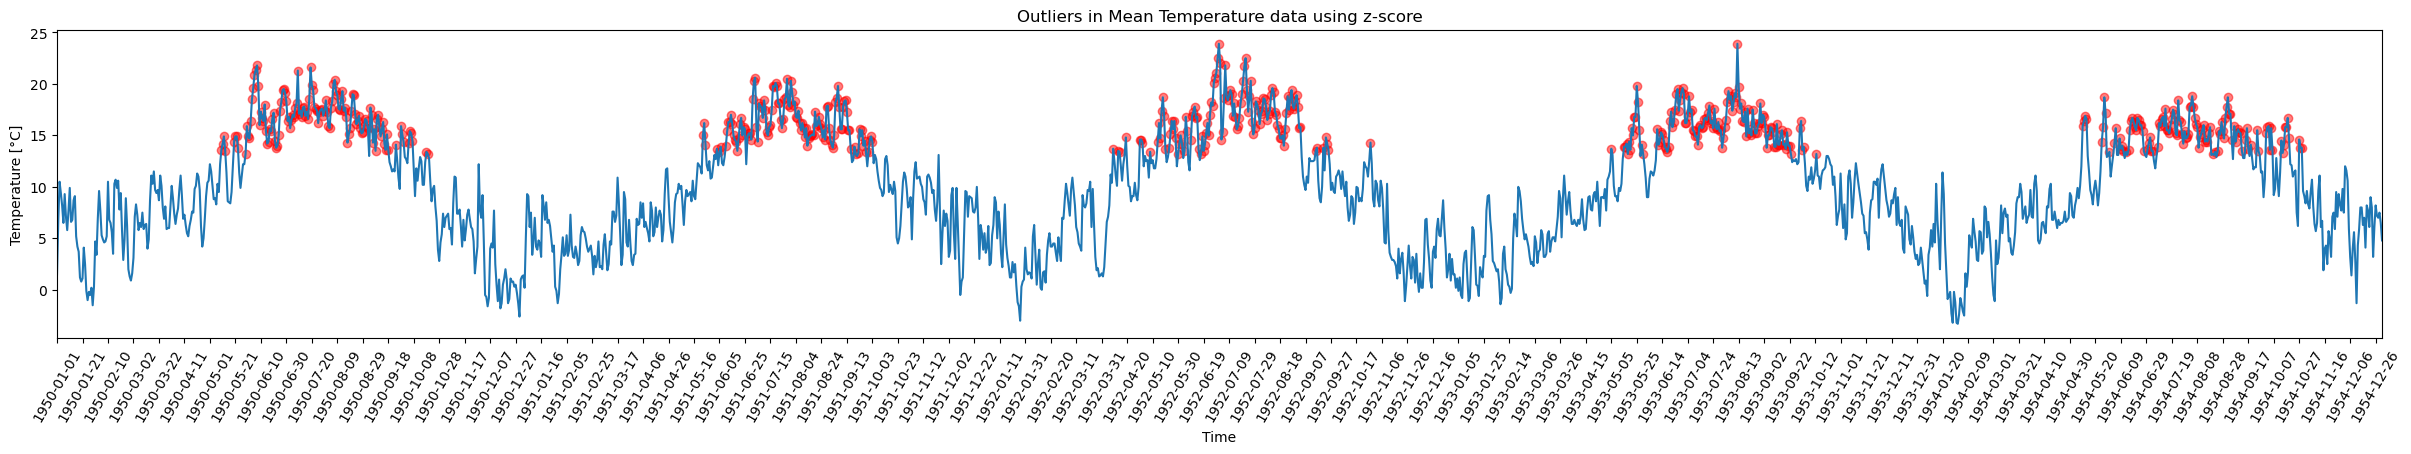

In [47]:
def mark_outliers(ax: plt.Axes, x: ArrayLike, y: ArrayLike, outliers_idx: ArrayLike) -> plt.Axes:
    """
    Plots red circles around the outliers in a certain line plot.

    Args:
        ax (plt.Axis): the older axis to plot on that contains the original line plot
        x (ArrayLike): the x-data for the line plot
        y (ArrayLike): the y-data for the line plot
        outliers_idx (ArrayLike): indices of the outliers
    """

    # add your code here
    time = np.array(x)[outliers_idx] #Find the outliers_ifx at x
    outliers = np.array(y)[outliers_idx] #Find the outliers_ifx at y

    ax.scatter(time, outliers, c="red", alpha=0.5)
    return ax

# get the data
x = time_series['time']
y = time_series['temperature_2m_mean']

# plot the data
fig, ax = lineplot(x, y, "Outliers in Mean Temperature data using z-score", "Time", "Temperature [°C]")

# overlay outliers
ax = mark_outliers(ax, x, y, outliers_idx)
plt.show()

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 5.3: Detect outliers using the IQR method </h4>

* Create a function `iqr_detect(x, threshold=1.5)` that returns the indices of the outliers in the original data according to the **IQR** method
* Plot the data with the marked outliers
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* You can use `np.quantile` to get the quantile of a uniform, discrete distrbution

</div>


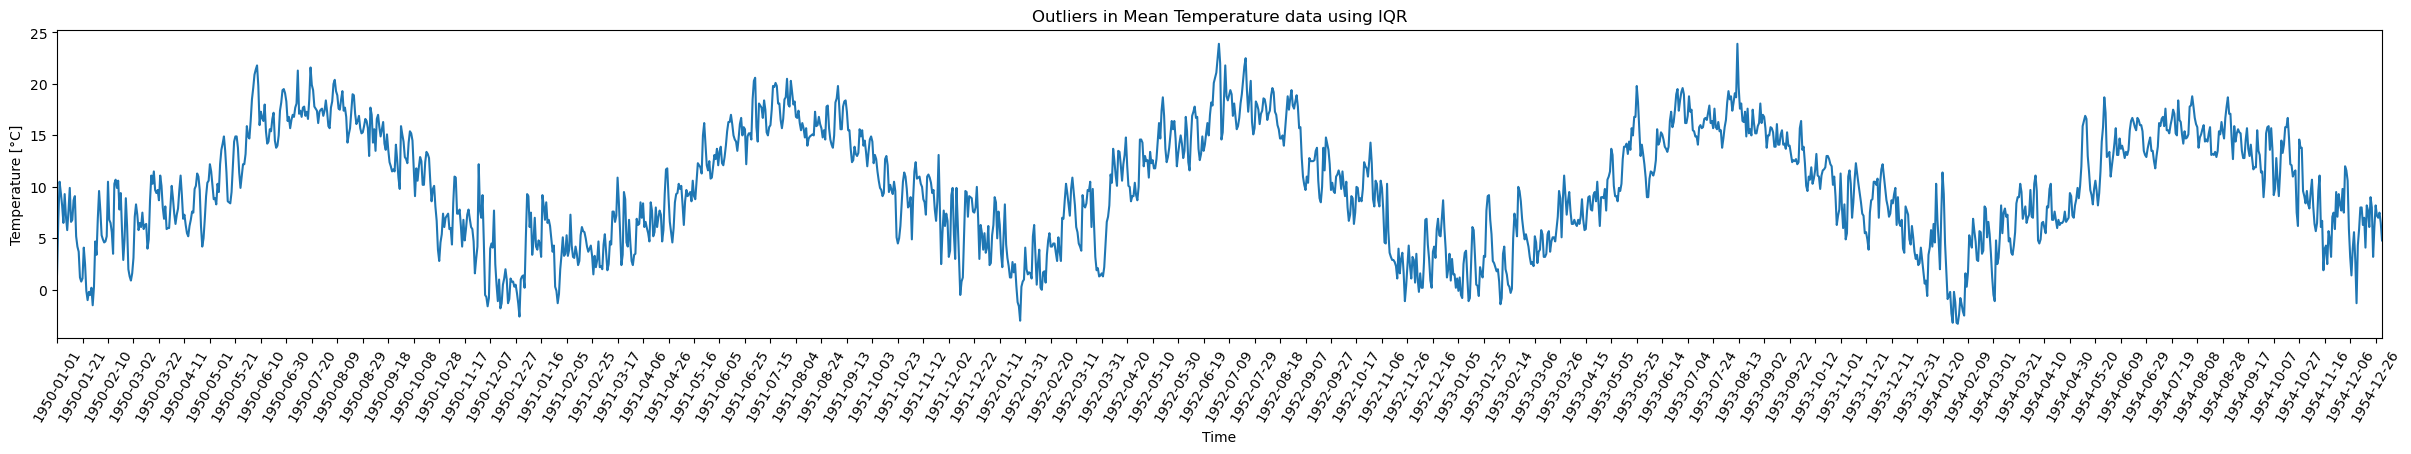

In [48]:
def iqr_detect(x: ArrayLike, threshold: float=1.5) -> ArrayLike:
    """
    Detects outliers using the interquantile range method and returns the indices of the outliers.

    Args:
        x (ArrayLike): data to be checked for outliers
        threshold (float): threshold for the interquantile range method
    
    Returns:
        (ArrayLike): indices of the outliers
    """
    # add your code here
    x = np.array(x)
    x_q1 = np.quantile(x, 0.25)
    x_q3 = np.quantile(x, 0.75)

    #Compute the Interquartile Range (IQR)
    IQR = x_q3 - x_q1

    #Determine the Outlier Cut-off Points
    #Lower Bound
    IQR_min = x_q1 - (threshold*IQR)
    #Upper Bound
    IQR_max = x_q3 + (threshold*IQR)

    IQR_outliers = np.logical_and(x < IQR_min, x > IQR_max)

    return IQR_outliers

# get the data
x = time_series['time']
y = time_series['temperature_2m_mean']

# detect outliers
outliers_idx = iqr_detect(y)

# plot the data
fig, ax = lineplot(x, y, "Outliers in Mean Temperature data using IQR", "Time", "Temperature [°C]")

# overlay outliers
ax = mark_outliers(ax, x, y, outliers_idx)
plt.show()

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 6: Clamping outliers</h4>

* One way to deal with outliers is to compress them into a range of acceptable values
* Create a function `zscore_clamp(x, threshold=3)` that clamps the outliers into the range between 10th percentile and 90th percentile
* The function should return a numpy array containing the clamped data
* Plot the non-clamped data over the clamped one
  
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* Not every outlier is bad!! For example in financial problems, such as stock prediction, outliers is **exactly** what you are looking for
* **Removing outliers in that case might not benefit our analysis**
* Always make an **informed** decision whether to remove outliers and always **justify** it

</div>


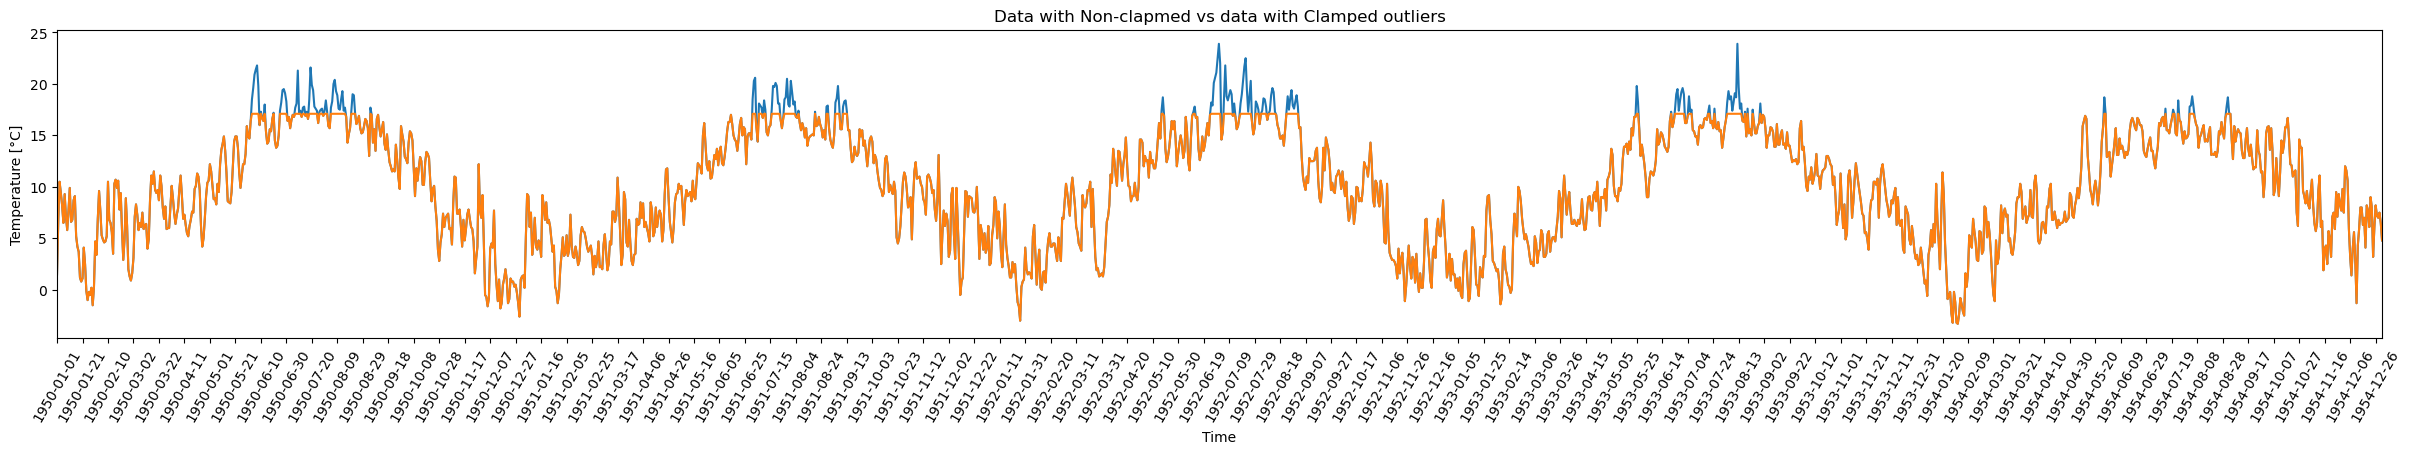

In [49]:
def zscore_clamp(x: ArrayLike, threshold: int=3) -> ArrayLike:
    """
    Clamps outliers using the z-score method and returns the clamped data.

    Args:
        x (ArrayLike): data to be clamped
        threshold (int): threshold for the z-score method

    Returns:
        (ArrayLike): clamped data
    """
    # add your code here
    indices = zscore_outliers(x)

    percentile_10 = np.quantile(x, 0.1)
    percentile_90 = np.quantile(x, 0.9)

    x = np.copy(x)
    for idx in indices:
        x[idx] = np.clip(x[idx], percentile_10, percentile_90)    

    return x

    
# get the data
x = time_series['time']
y = time_series['temperature_2m_mean']


# plot the data
fig, ax = lineplot(x, y, "Data with Non-clapmed vs data with Clamped outliers", "Time", "Temperature [°C]")

#Clamp the outliers
Zclamp = zscore_clamp(y)

# overlay outliers
ax.plot(x, Zclamp)
plt.show()

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 6.1: Replace outliers by n-degree interpolation </h4>

* Create a function `zscore_interp(x, time, threshold=3, deg=3)` that replaces the z-score outliers with values from a polynomial fit on clean data
* The function should return a numpy array containing the interpolated data
* Plot the data before and after replacing outliers
* Experiment with different value of `deg`, e.g., `1`, `3`, `11`, and `23`
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* You can index a numpy array with another numpy array of boolean values
* This will return only the values at which the index is `True`
* Try using this method to get only the clean data (that without outliers)
</div>


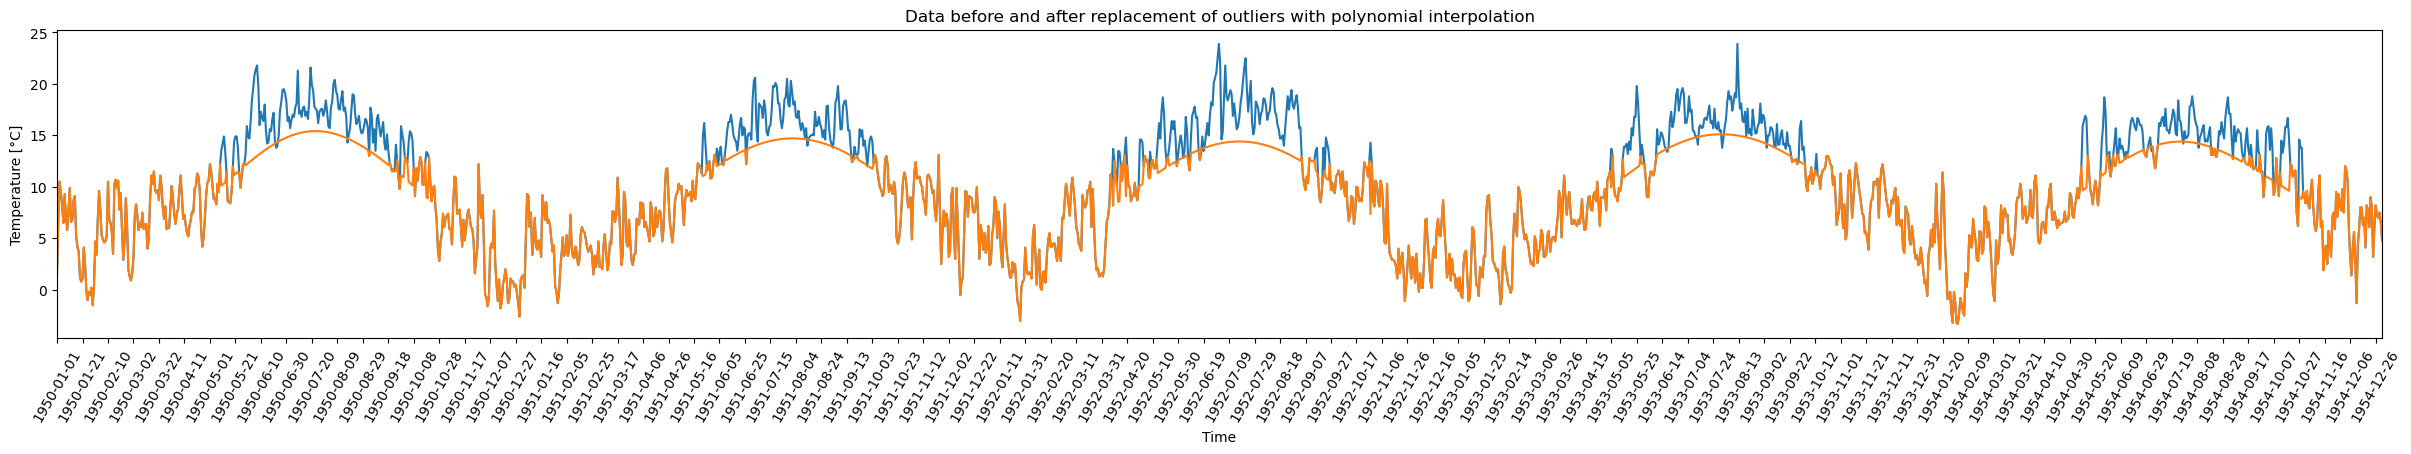

In [57]:
def zscore_interp(x: ArrayLike, y: ArrayLike, threshold: int=3, deg: int=1) -> ArrayLike:
    """
    Interpolates outliers using the z-score method and returns the interpolated data using a `deg`-degree approximation.

    Args:
        x (ArrayLike): x-variate of data to be interpolated
        y (ArrayLike): y-variate of data to be interpolated
        threshold (int): threshold for the z-score method
        deg (int): degree of the polynomial approximation

    Returns:
        (ArrayLike): interpolated data
    """
    # add your code here
    # make sure that the data is an array
    x = np.array(x) #time
    y = np.array(y)

    # get the outliers indices
    outliers_idx = zscore_outliers(y)
    is_outlier = np.array([False]*len(x))
    is_outlier[outliers_idx] = True

    #Clean data of y    
    clean_data = y[np.logical_not(is_outlier)]
    
    #Clean data of x
    x = np.arange(len(x)) #Create array [0,...,len(x)]
    clean_time = x[np.logical_not(is_outlier)] #x[...] is used to filter the array and only select "True"

    # fit the interpolation model to the data
    model = np.polynomial.Polynomial.fit(clean_time, clean_data, deg=deg)

    #nonzero_indices = np.nonzero(a) - Position in the array where a is not zero 
    interpolated = np.copy(y)
    for idx in np.nonzero(is_outlier):
        interpolated[idx] = model(idx) #Put the new points in the plot
    
    return interpolated

# get the data
x = time_series['time']
y = time_series['temperature_2m_mean']

# get the interpolated data
interpolated = zscore_interp(x, y, deg=21)

# plot both data overlayed
fig, ax = lineplot(x, y, "Data before and after replacement of outliers with polynomial interpolation", "Time", "Temperature [°C]")

# add the clamped data on top
ax.plot(x, interpolated)
plt.show()